In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
import pandas as pd
import glob
import os
import re
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import csv
import math
import copy
from scipy.optimize import curve_fit
import scipy.stats as st
import sys
from tqdm import tqdm

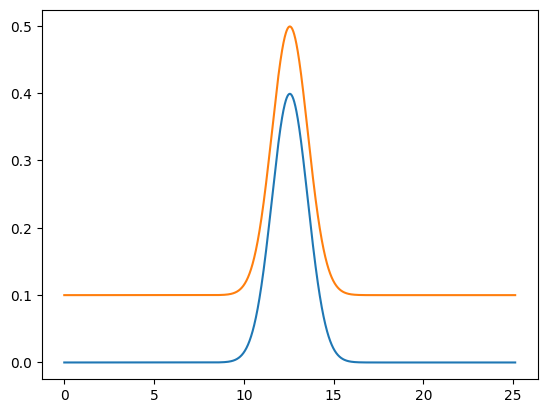

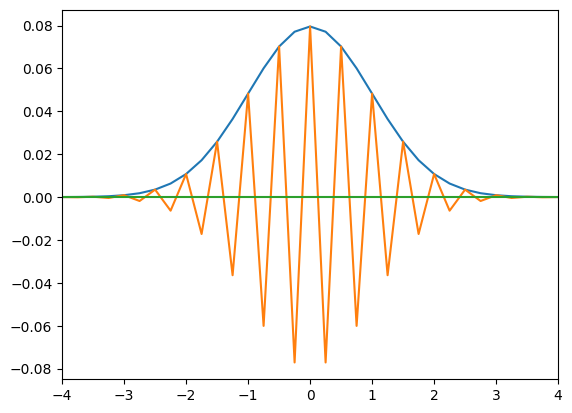

In [100]:
### 量子化(離散化) ###
N = 2048# サンプル数 [個]
L = 8 * np.pi
dx = L / N # サンプリング間隔 [m]

### 入力信号 y(t) ###
X = np.linspace(0, L, N, endpoint=False) # 0からLまでのN個の等間隔な数列
# X= np.linspace(-L/2, L/2, N, endpoint=False)
# y = 1 * np.sin(X) - 3 * np.cos(3* X) + 2 * np.sin(2 * X)
# y=2.5*np.sin(1.5*X)
# Y=1.5*np.sin(2.5*X)+2.5*np.cos(1.5*X)
Y=np.exp(-(X-L/2)**2/2)/np.sqrt(2*np.pi)
# Y=3*np.exp(-X)

y_tilde = np.fft.fft(Y) / (N/2)

shifted_y_tilde = np.fft.fftshift(y_tilde)

y_decoded = np.fft.ifft(y_tilde) * (N/2)
plt.plot(X, Y) # y-t グラフのプロット
plt.plot(X, np.real(y_decoded) + 0.1)
# plt.xlim(-10,10) 
plt.show()

k= np.fft.fftfreq(N,d=dx) *2*np.pi
shifted_k= np.fft.fftshift(k)

# plot
plt.plot(shifted_k, np.abs(shifted_y_tilde))
plt.plot(shifted_k, np.real(shifted_y_tilde))
plt.plot(shifted_k, np.imag(shifted_y_tilde))
k_max = N/2 * (2*np.pi / L)
plt.xlim(-4, 4)
plt.show()

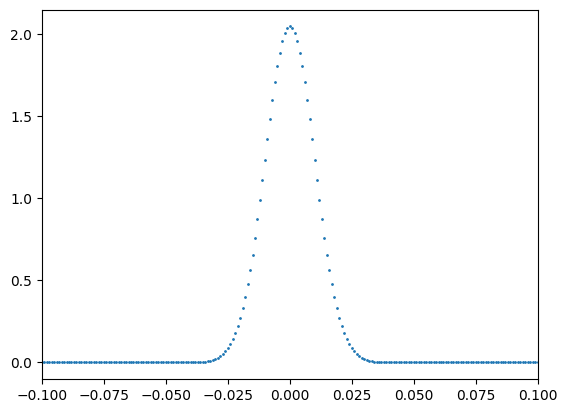

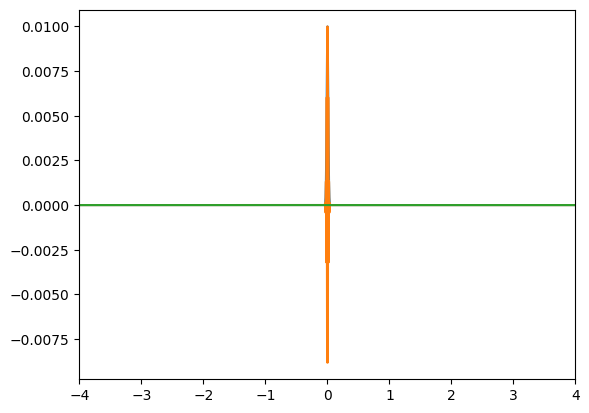

In [66]:
#sampling rate
N=2048
L=1000
dx=L/N

X=np.linspace(0,L,N,endpoint=False)
# Y=1.5*np.sin(2.5*X)+2.5*np.cos(1.5*X)
Y=np.exp(-(X-L/2)**2/(2*16**2))/(np.sqrt(2*np.pi)*16)
# Y=3*np.exp(-X)

#plot
# plt.plot(X,Y)

#FFT
y_fft=np.fft.fft(Y)
freq=np.fft.fftfreq(N,dx)
plt.scatter(freq,np.abs(y_fft),s=1)
plt.xlim(-0.1,0.1)
# plt.scatter(freq,np.abs(y_fft),s=1)
# y_fft=np.fft.fft(Y)/(N/2)
# shifted_y_fft=np.fft.fftshift(y_fft)

#Inverse FFT
# y_fft_inv=np.fft.ifft(y_fft)*(N/2)

#plot
# plt.plot(X,np.real(y_fft_inv)+0.1)
plt.show()

#plot
k=np.fft.fftfreq(N,d=dx)*2*np.pi
k_shifted=np.fft.fftshift(k)

plt.plot(k_shifted,np.abs(shifted_y_fft))
plt.plot(k_shifted,np.real(shifted_y_fft))
plt.plot(k_shifted,np.imag(shifted_y_fft))
plt.xlim(-4,4)
plt.show()


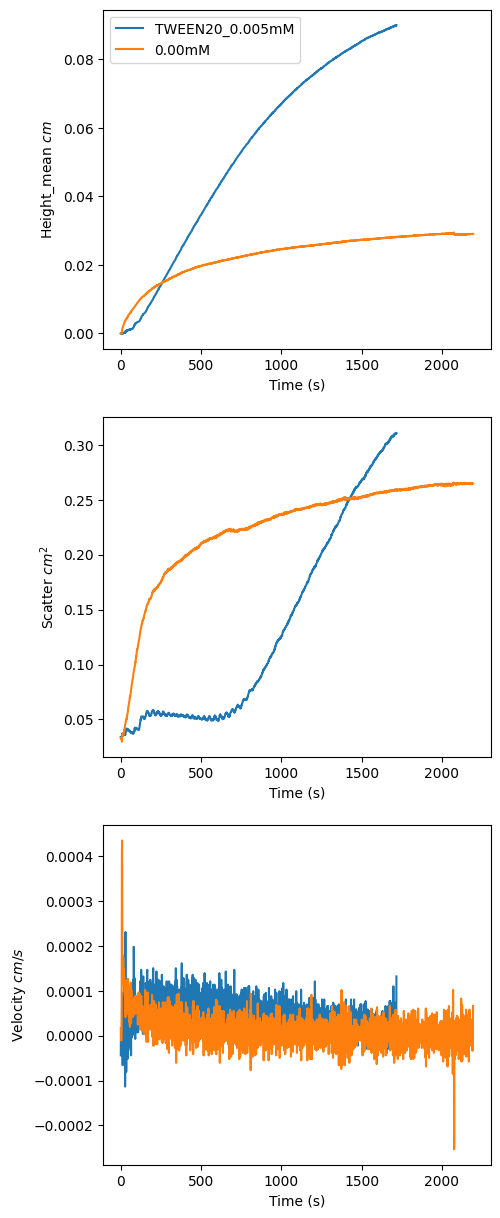

In [101]:
data_path1="D:/master_thesis_data/experment_data/movie_data/movie_data/data_for_test/surface_growth/20241010/surface_groth_test_5V_TWEEN20_0.005mM_20241010/surface_groth_test_5V_TWEEN20_0.005mM_20241010_edited_data.csv"
data_path2="D:/master_thesis_data/experment_data/movie_data/movie_data/data_for_test/surface_growth/20241010/surface_groth_test_5V_0.00mM_20241010/surface_groth_test_5V_0.00mM_20241010_edited_data.csv"
data_list=[data_path1,data_path2]
data_kind_list=["Height_mean "+ r"$cm$","Scatter "+ r"$cm^2$","Velocity "+ r"$cm/s$"]
label_list=["TWEEN20_0.005mM","0.00mM"]
fig ,ax=plt.subplots(3,1,figsize=(5,15))
for i,data_path in enumerate(data_list):
    data=pd.read_csv(data_path)
    time=data["Time"]
    hight=data["Height_mean (cm)"]-data["Height_mean (cm)"][0]
    scatter=data["Scatter"]
    v=np.gradient(hight,time)

    #plot
    ax[0].plot(time,hight)
    ax[1].plot(time,scatter)
    ax[2].plot(time,v)
    for j in range(3):
        ax[j].set_xlabel("Time (s)")
        ax[j].set_ylabel(data_kind_list[j])
    ax[0].legend(label_list)
